In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color= ['1A0CA2', '34E29F', 'E4F325', 'F35D25']) 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.titlecolor']     = 'k'
mpl.rcParams['axes.titlesize']      = 16
mpl.rcParams['axes.titleweight']    = 'bold'
mpl.rcParams['axes.titlelocation']  = 'left' 
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['axes.edgecolor']      = 'D6E5F7' 
mpl.rcParams['axes.axisbelow']      = True 
mpl.rcParams['axes.xmargin']        = .05
mpl.rcParams['axes.ymargin']        = .05
mpl.rcParams['axes.zmargin']        = 0
mpl.rcParams['xtick.color']         = 'k'
mpl.rcParams['ytick.color']         = 'k'
mpl.rcParams['xtick.major.size']    = 12
mpl.rcParams['ytick.major.size']    = 12
mpl.rcParams['xtick.labelsize']     = 12
mpl.rcParams['ytick.labelsize']     = 12
mpl.rcParams['lines.color']         = '1A0CA2'
mpl.rcParams['text.color']          = '656566'
mpl.rcParams['font.style']          = 'normal'
mpl.rcParams['font.weight']         = 200
mpl.rcParams['figure.autolayout']   = True

In [5]:
x= np.random.random(100)
y= np.random.random(100)

Text(0.0, 1.0, 'sds')

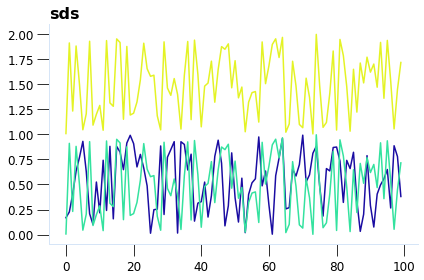

In [6]:
fig, axes = plt.subplots(nrows=1)
axes.plot(x)
axes.plot(y)
axes.plot(y+1)
axes.set_title('sds')

In [7]:
# Enter raw data
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])

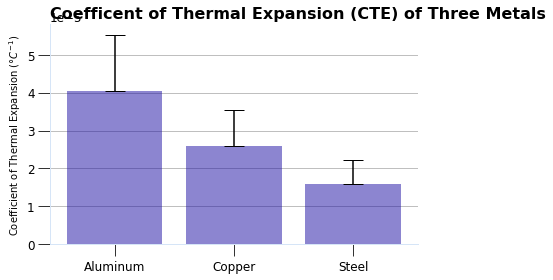

In [8]:
# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)

# Create lists for the plot
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [[0,0,0], [aluminum_std, copper_std, steel_std]]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

In [9]:
# Shap values

# !pip install shap
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)

In [10]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    diabetes.data, diabetes.target, random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.35666062386954545

In [11]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023


In [16]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Plot a heat Map upper triangular

<AxesSubplot:>

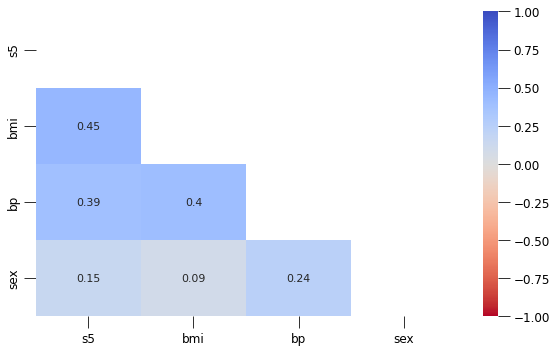

In [27]:
var  = ['s5', 'bmi', 'bp', 'sex']

import seaborn as sns
vars_corr = df[var].corr()

mask = np.triu(np.ones_like(vars_corr, dtype=bool))

plt.figure(figsize=(8, 5))
sns.heatmap(vars_corr.round(2), mask=mask, vmin=-1, vmax=1,cmap='coolwarm_r', 
            annot=True, annot_kws={"fontsize":11})
# plt.savefig('echo_cors.png', dpi=400, bbox_inches='tight')